Import packages, dependences are listed.

In [ ]:
# !pip install numpy
# !conda install matplotlib
# !pip install lmfit

In [1]:
from xrd2021.curve_pre import curve
from xrd2021.element_data import crystal
import xrd2021.peaks_analysis as pa
import numpy as np
from xrd2021.peaks_analysis import lattice_parameter_calculator as lpc

Import xrd spectrum data

In [2]:
C1 = curve(curvetype = 'diffracton', infilename = 'data/Al40kO.txt')

Plot the spectrum to have the first view of data

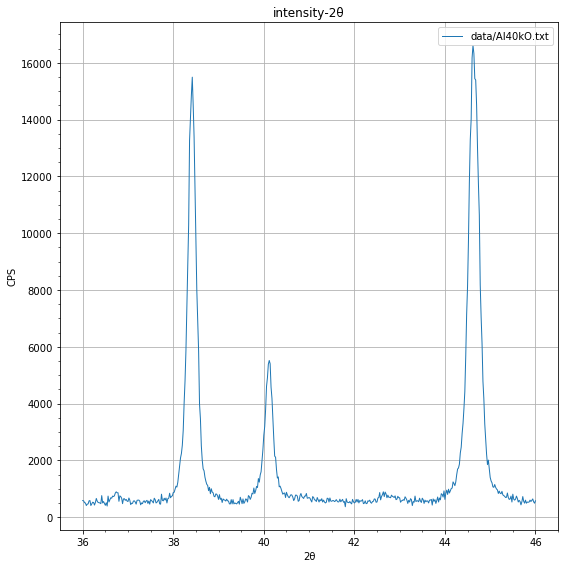

In [3]:
C1.plot(log_scale=False, show_points=False)

Preparation 1: Clear the background

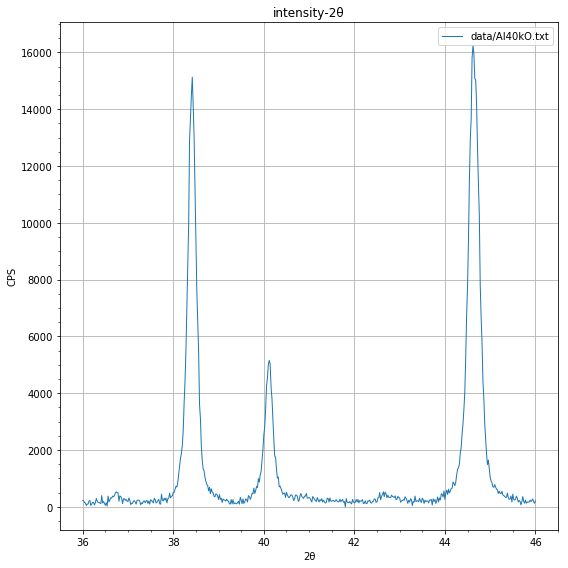

In [4]:
C1.clear_background()

Preparation 2: fitting curve
    
we need to tell initial estimate positions of peaks

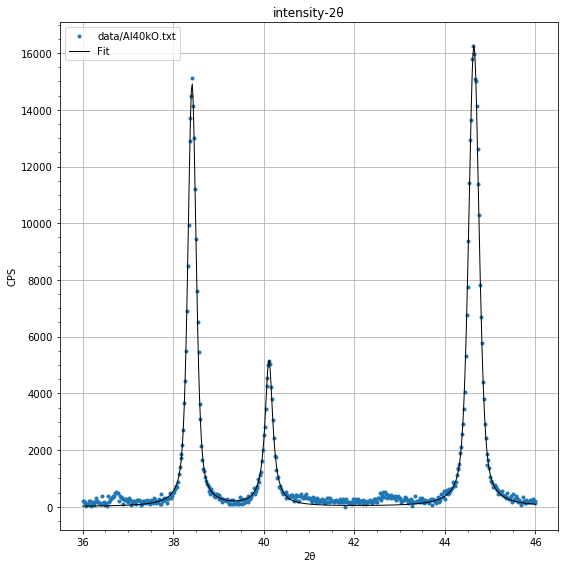

In [5]:
maxi = np.array([38, 40, 45])
fit_result = C1.fit(maxi)

View the fitting result

In [6]:
fit_result

In [7]:
y_fit = fit_result.model.eval(fit_result.params, x=C1.theta2_deg)

In [8]:
C_fit = C1
C_fit.CPS = y_fit

Plot fitting curve

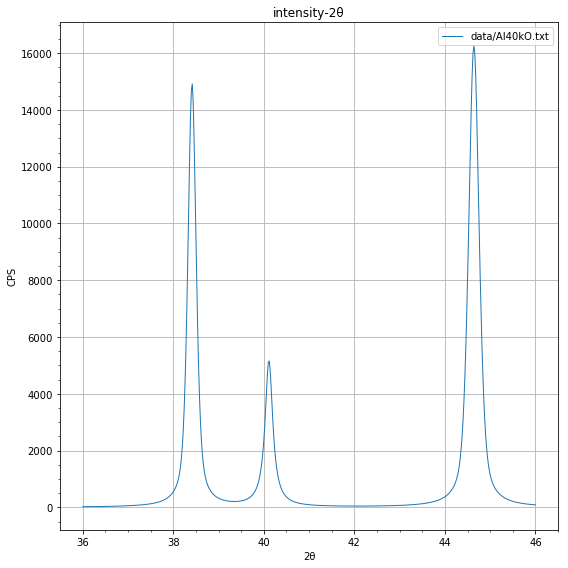

In [9]:
C_fit.plot()

Analysis 1: Find peaks using fitting curve

In [10]:
th, position = pa.peakfinder(C_fit)

In [11]:
th

array([38.42, 40.12, 44.64])

In [12]:
position

[121, 206, 432]

In [13]:
C_fit.peaks_position = position

In [14]:
ind = pa.peakindex(th, C_fit.wavelength, 'Al')

Analysis 2: Index the peaks as (hkl)

In [15]:
ind

array([[1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 2.]])

The second one is [0, 0, 0], we know it is because the code failed to index the second peak. We will manually delete that peak from the list of indexed peaks.

In [16]:
ind = np.array([[1,1,1], [0,0,2]])

In [17]:
C_fit.index = ind
C_fit.peaks_position = [121, 432]

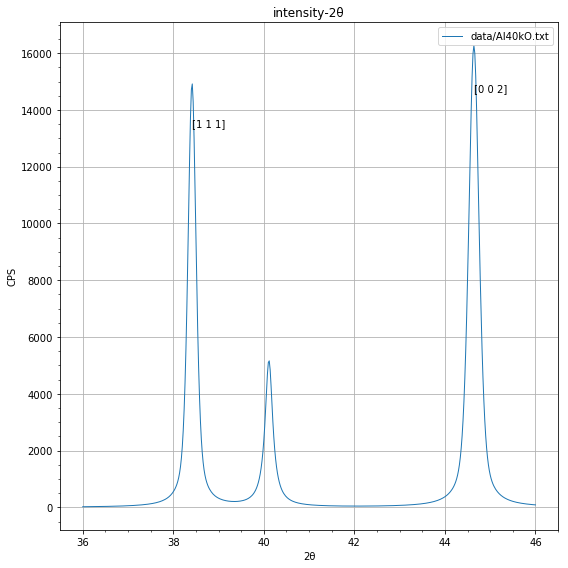

In [18]:
C_fit.plot()

Calculate the lattice parameter using experimental data

In [19]:
lpc([38.42, 44.64], C_fit.wavelength, ind)

4.057613776300334